In [1]:
from model.dqn_agent import Agent
from environment import BananaEnvironment
import numpy as np
from collections import deque
import torch
import matplotlib.pyplot as plt
import cv2
import os.path
from os import path

In [2]:
# Choose mode, in 'visual' the state is represented by a an 84x84 image of what the agent sees
# Otherwise, the state is represented by a 37 elements array
mode = 'normal' 
if mode == 'visual':
    env_folder = 'VisualBanana_Linux'
    checkpoint_path = "checkpoints/checkpoint_vis.pth"   
    target_checkpoint_path = "checkpoints/checkpoint_vis_target.pth"
else:
    env_folder = 'Banana_Linux_NoVis'
    checkpoint_path = "checkpoints/checkpoint.pth"     

In [3]:
# Create agent with environment and training parameters
agent = Agent(mode = mode, state_size=37, action_size=4, seed=0,
             buffer_size = int(1e5), batch_size = 64, 
             gamma = 0.99, tau = 1e-3, lr =5e-4, update_every = 4)

# Load checkpoints if they exist
# if mode == 'visual':
#     if(path.exists(checkpoint_path) and path.exists(target_checkpoint_path)):
#         print("Checkpoint files for visual dqn agent found")
#         agent.qnetwork_local.load_state_dict(torch.load(checkpoint_path))
#         agent.qnetwork_target.load_state_dict(torch.load(target_checkpoint_path))        
# else:
#     if(path.exists(checkpoint_path)):
#         print("Checkpoint files for dqn agent found")
#         agent.qnetwork_local.load_state_dict(torch.load(checkpoint_path))
        
# Create Banana game Unity environment
env = BananaEnvironment(env_folder)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 1.15
Episode 200	Average Score: 5.15
Episode 300	Average Score: 7.89
Episode 400	Average Score: 10.92
Episode 500	Average Score: 13.95
Episode 600	Average Score: 14.55
Episode 700	Average Score: 15.26
Episode 800	Average Score: 14.91
Episode 900	Average Score: 14.96
Episode 1000	Average Score: 15.67


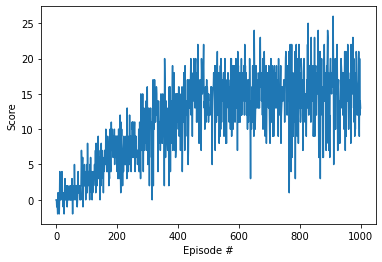

In [4]:
def dqn(n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps) # Calculate agent from Deep Q-Network
            next_state, reward, done, _ = env.step(action) # Perform action and get new state and reward
            agent.step(state, action, reward, next_state, done) # Perform agent step (save experience and learn every n steps)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=16.0:  # If environment, solved, save network weights
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), checkpoint_path)
            np.savez("scores.npz",np.array(scores))
            break
    torch.save(agent.qnetwork_local.state_dict(), checkpoint_path)
    
    return scores

# Train the dqn agent and plot scores during training
scores = dqn()
env.close()
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()